### Імпорт бібліотек

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import minkowski
import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="sklearn.cluster._kmeans")

### Датасет

In [2]:
file_path = "data5.xlsx"
df = pd.read_excel(file_path, sheet_name=0, skiprows=2)

df.columns = ['Продукт', 'Продажі', 'Відсоток_до_підсумку',
              'На_одну_особу_грн', 'Мережа_тис_грн',
              'Відсоток_до_групи_мережі', 'Додатковий_відсоток']

df = df.dropna()
df['Продажі'] = pd.to_numeric(df['Продажі'].astype(str).str.replace(',', '.'), errors='coerce')
df = df.dropna(subset=['Продажі'])

df["Індекс"] = np.arange(1, len(df) + 1)

In [3]:
df.head(25)

,Продукт,Продажі,Відсоток_до_підсумку,На_одну_особу_грн,Мережа_тис_грн,Відсоток_до_групи_мережі,Додатковий_відсоток,Індекс
0,М'ясо та птиця свіжі та заморожені,2559470.7,"2,4","59,6","2439547,0","95,3","79,9",1
1,"М'ясо копчене, солоне та ковбасні вироби",2282388.0,"2,1","53,2","2192554,1","96,1","84,2",2
2,"Консерви, готові продукти м'ясні",280761.0,"0,3","6,5","267239,2","95,2","78,2",3
3,у тому числі напівфабрикати м'ясні,126643.1,"0,1","3,0","121545,3","96,0",-,4
4,Риба і морепродукти харчові,1204636.8,"1,1","28,1","734695,8","61,0","62,0",5
5,"Консерви, готові продукти рибні",551847.6,"0,5","12,9","398503,7","72,2","68,1",6
6,у тому числі напівфабрикати рибні,113203.6,"0,1","2,6","92542,8","81,7",-,7
7,Молоко та продукти молочні,2326818.6,"2,2","54,2","2196390,7","94,4","93,7",8
8,"Сир сичужний, плавлений та кисломолочний",1460041.9,"1,4","34,0","1278439,4","87,6","88,9",9
9,Масло вершкове,564347.9,"0,5","13,1","550823,3","97,6","89,0",10


### Візуалізація даних

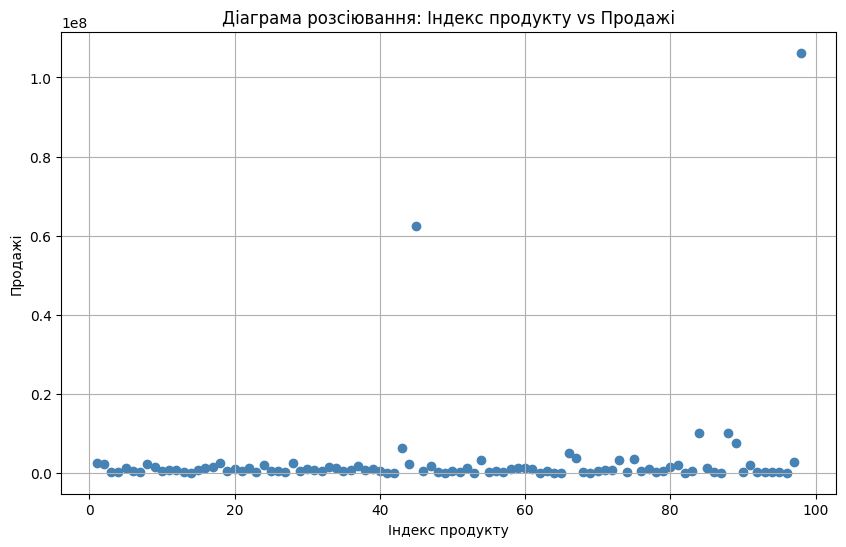

In [3]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Індекс"], df["Продажі"], color='steelblue')
plt.title("Діаграма розсіювання: Індекс продукту vs Продажі")
plt.xlabel("Індекс продукту")
plt.ylabel("Продажі")
plt.grid(True)

**Масштабування даних**

In [4]:
scaler = StandardScaler()
X = scaler.fit_transform(df[["Продажі"]].values)

### Метод ліктя

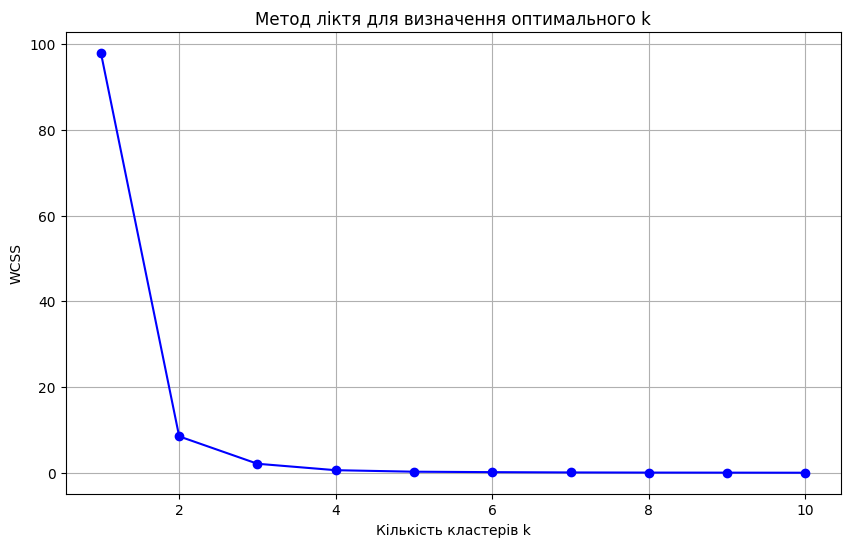

In [29]:
wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', color='blue')
plt.title("Метод ліктя для визначення оптимального k")
plt.xlabel("Кількість кластерів k")
plt.ylabel("WCSS")
plt.grid(True)

### Обчислення оптимального k за методом ліктя

In [14]:
def find_elbow(wcss):
    deltas = np.diff(wcss)
    ratio = deltas[:-1] / deltas[1:]
    return np.argmax(ratio) + 2

optimal_k_elbow = find_elbow(wcss)
print(f"Оптимальна кількість кластерів k за методом ліктя: {optimal_k_elbow}")

Оптимальна кількість кластерів k за методом ліктя: 2


### Метод силуету

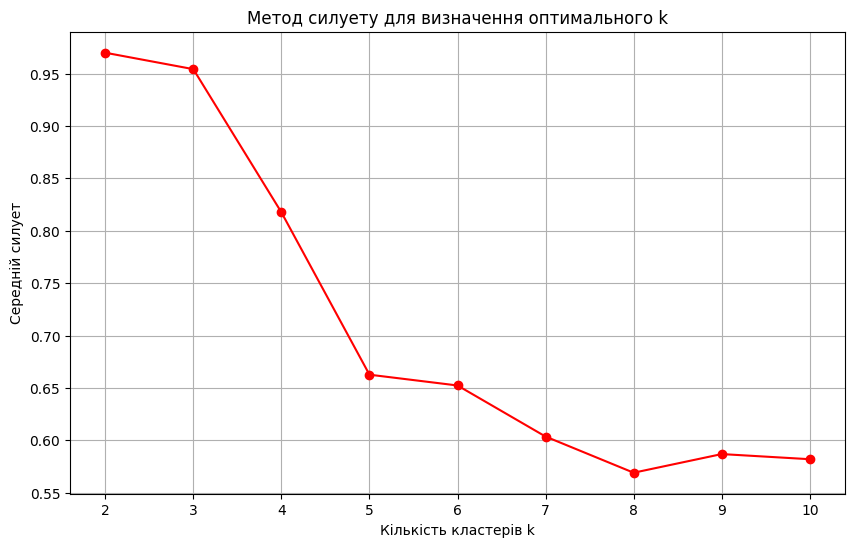

In [31]:
silhouette_scores = []
K_range = range(2, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    silhouette_scores.append(score)

plt.figure(figsize=(10, 6))
plt.plot(K_range, silhouette_scores, marker='o', color='red')
plt.title("Метод силуету для визначення оптимального k")
plt.xlabel("Кількість кластерів k")
plt.ylabel("Середній силует")
plt.grid(True)

### Обчислення оптимального k за методом силуету

In [24]:
optimal_k_silhouette = K_range[np.argmax(silhouette_scores)]
print(f"Оптимальна кількість кластерів за методом силуету: {optimal_k_silhouette}")

Оптимальна кількість кластерів за методом силуету: 2


### Кластеризація з оптимальним k

In [18]:
optimal_k = optimal_k_silhouette

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', max_iter=300, n_init=10, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
centers = kmeans.cluster_centers_

### Обчислення функціоналу якості Q₁

In [19]:
def compute_Q1(X, labels, centers, p=4):
    Q1 = 0
    for i in range(len(X)):
        center = centers[labels[i]]
        Q1 += minkowski(X[i], center, p)
    return Q1

Q1 = compute_Q1(X, y_kmeans, centers, p=4)

print("\nЦентри кластерів (нормалізовані значення):")
for i, c in enumerate(centers):
    print(f"Кластер {i+1}: {c[0]:.4f}")

print(f"\nФункціонал якості кластеризації Q₁ (метрика Мінковського, p=4): {Q1:.4f}")


Центри кластерів (нормалізовані значення):
Кластер 1: -0.1379
Кластер 2: 6.6206

Функціонал якості кластеризації Q₁ (метрика Мінковського, p=4): 12.4659


### Візуалізація результатів кластеризації

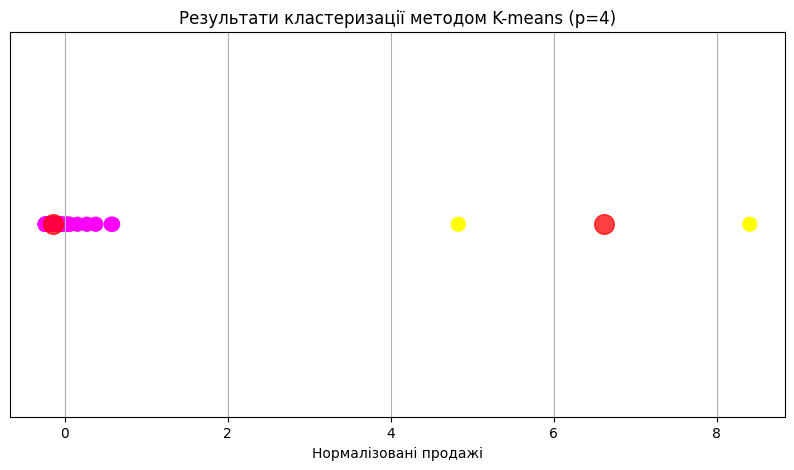

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(X[:, 0], X[:, 0]*0, c=y_kmeans, s=100, cmap='spring')
plt.scatter(centers[:, 0], [0]*len(centers), c='red', s=200, alpha=0.75)
plt.title('Результати кластеризації методом K-means (p=4)')
plt.xlabel('Нормалізовані продажі')
plt.yticks([])
plt.grid(True)